In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df_label = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/label/label_clean.csv')

In [27]:
df_clean = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/tabular_lstm/tabular_lstm_clean.csv')

In [28]:
df_label = df_label[df_label['mssv'].isin(df_clean['mssv'])]

In [29]:
value_counts = df_label['label'].value_counts()

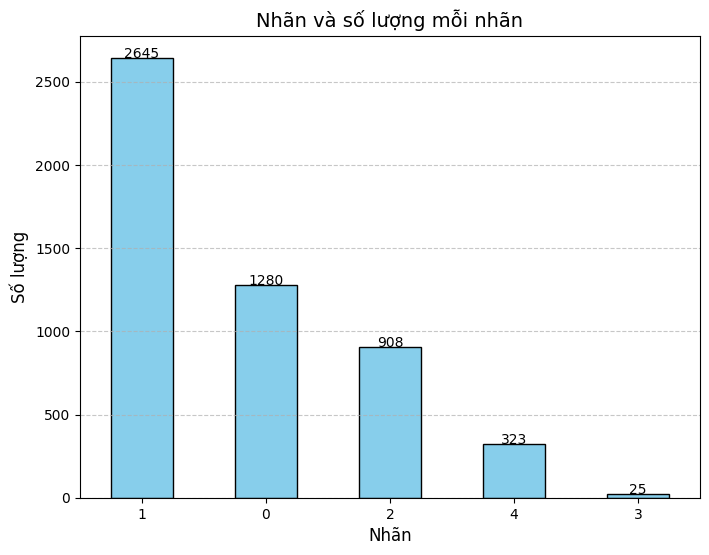

In [32]:
# Plotting the bar chart with numbers above the columns
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add numbers above each bar
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=10)

plt.title('Nhãn và số lượng mỗi nhãn', fontsize=14)
plt.xlabel('Nhãn', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Gán nhãn lại dựa trên điểm rèn luyện đối với sinh viên giỏi và xuất sắc

In [33]:
df_drl = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/drl_pivot.csv')

In [34]:
df_drl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9555 entries, 0 to 9554
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mssv     9555 non-null   object
 1   term 1   9555 non-null   int64 
 2   term 2   9555 non-null   int64 
 3   term 3   9555 non-null   int64 
 4   term 4   9555 non-null   int64 
 5   term 5   9555 non-null   int64 
 6   term 6   9555 non-null   int64 
 7   term 7   9555 non-null   int64 
 8   term 8   9555 non-null   int64 
 9   term 9   9555 non-null   int64 
 10  term 10  9555 non-null   int64 
 11  term 11  9555 non-null   int64 
 12  term 12  9555 non-null   int64 
 13  term 13  9555 non-null   int64 
 14  term 14  9555 non-null   int64 
 15  term 15  9555 non-null   int64 
 16  term 16  9555 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 1.2+ MB


In [35]:
import pandas as pd

# Melt the DataFrame to long format
df_long = pd.melt(df_drl, id_vars=['mssv'], var_name='term', value_name='score')

# Display the first few rows of the reshaped DataFrame
print(df_long.head(100))

                                        mssv    term  score
0   0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G  term 1    100
1   00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD  term 1     81
2   000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q  term 1     85
3   0013D6E5XPvAibaEXe85hkLGQAJy3XgK9pA18A31  term 1     90
4   001BB05EXPvAibaEXe/YKAlYnC3m92BzM+VhZyc0  term 1     59
..                                       ...     ...    ...
95  02C4644FXPvAibaEXe+wmtNhlfgIwhu0VSXU3tYN  term 1     86
96  02D11BA0XPvAibaEXe/twT+sf632fV68MOhuBLMU  term 1    100
97  02D9A220XPvAibaEXe+KnWgScvZ27LP2iqB5e3NW  term 1     78
98  02F183F0XPvAibaEXe/kJUgsv26Ua01LZ73bPyUY  term 1     90
99  02FA9B28XPvAibaEXe9hPQQhQOOPyX9iSjJX1yiu  term 1     59

[100 rows x 3 columns]


In [36]:
df_long = df_long[df_long['score']!=-1]

In [37]:
df_long = df_long.groupby('mssv', as_index=False)['score'].mean()

In [38]:
df_grouped_mean = df_long

In [39]:
df_label_good = df_label[df_label['label'] == 0]

In [40]:
df_grouped_mean_gioi = df_grouped_mean[df_grouped_mean['mssv'].isin(df_label_good['mssv'])]

In [41]:
df_grouped_mean_gioi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 0 to 9551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    1280 non-null   object 
 1   score   1280 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.0+ KB


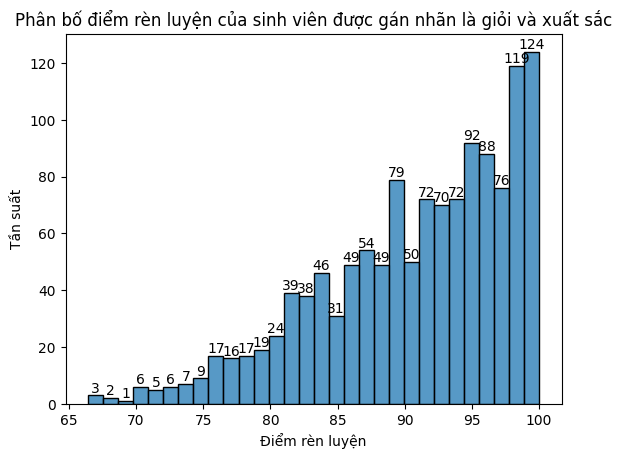

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of 'score'
ax = sns.histplot(df_grouped_mean_gioi['score'], kde=False, bins=30)

# Add title and labels
plt.title('Phân bố điểm rèn luyện của sinh viên được gán nhãn là giỏi và xuất sắc')
plt.xlabel('Điểm rèn luyện')
plt.ylabel('Tần suất')

# Add number above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


In [43]:
#Kiểm tra lại các sinh viên xuất sắc
df_dtb_toankhoa = pd.read_excel('/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_toankhoa.xlsx')

In [44]:
df_totnghiep = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/totnghiep_cleaned.csv')

In [45]:
df_xuatsac = df_label_good[
    df_label_good['mssv'].isin(df_dtb_toankhoa[df_dtb_toankhoa['dtb_toankhoa'] >= 9]['mssv']) |
    df_label_good['mssv'].isin(df_totnghiep[df_totnghiep[' xeploai'] == 'Xuất sắc']['mssv'])
]


In [46]:
df_xuatsac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 14 to 10124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mssv    28 non-null     object
 1   label   28 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


In [47]:
df_grouped_mean_xuatsac = df_grouped_mean[df_grouped_mean['mssv'].isin(df_xuatsac['mssv'])]

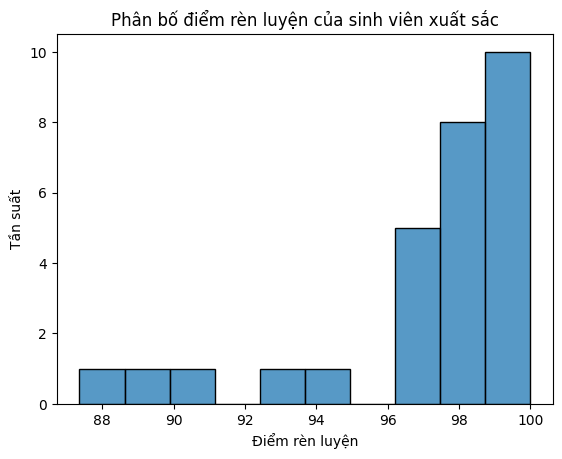

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of 'drl'
sns.histplot(df_grouped_mean_xuatsac['score'], kde=False, bins=10)

# Add title and labels
plt.title('Phân bố điểm rèn luyện của sinh viên xuất sắc')
plt.xlabel('Điểm rèn luyện')
plt.ylabel('Tần suất')

# Show the plot
plt.show()


# Kiểm tra số tín chỉ học lại

In [49]:
df_sinhvien_hoclai = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/sinhvien_hoclai.csv')

In [50]:
df_sinhvien_hoclai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8868 entries, 0 to 8867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    8868 non-null   object 
 1   sotc    8868 non-null   float64
dtypes: float64(1), object(1)
memory usage: 138.7+ KB


In [51]:
df_sinhvien_hoclai_exist = df_sinhvien_hoclai[df_sinhvien_hoclai['mssv'].isin(df_clean['mssv'])]

In [52]:
df_sinhvien_hoclai_exist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3208 entries, 0 to 8867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    3208 non-null   object 
 1   sotc    3208 non-null   float64
dtypes: float64(1), object(1)
memory usage: 75.2+ KB


In [53]:
df_label_good.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 3 to 10259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mssv    1280 non-null   object
 1   label   1280 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.0+ KB


In [54]:
df_sinhvien_hoclai_exist_good = df_sinhvien_hoclai_exist[df_sinhvien_hoclai_exist['mssv'].isin(df_label_good['mssv'])]

In [55]:
df_sinhvien_hoclai_exist_good.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 67 to 8860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    235 non-null    object 
 1   sotc    235 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [56]:
df_sinhvien_hoclai_exist_good['sotc'].value_counts()

,count
sotc,
4.0,62
3.0,60
2.0,35
0.0,25
6.0,12
8.0,10
7.0,10
5.0,9
1.0,2


In [57]:
df_dtb_toankhoa = pd.read_excel('/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_toankhoa.xlsx')

In [58]:
df_merge = pd.merge(df_sinhvien_hoclai_exist_good,df_dtb_toankhoa, on='mssv',how='inner')

In [59]:
df_merge['phantram'] = df_merge['sotc'] / df_merge['sotc_tichluy']

In [60]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          235 non-null    object 
 1   sotc          235 non-null    float64
 2   dtb_toankhoa  235 non-null    float64
 3   dtb_tichluy   235 non-null    float64
 4   sotc_tichluy  235 non-null    float64
 5   phantram      235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.1+ KB


In [63]:
df_invalid = df_merge[df_merge['phantram'] > 0.05]

In [64]:
df_invalid

,mssv,sotc,dtb_toankhoa,dtb_tichluy,sotc_tichluy,phantram
0,018B537BXPvAibaEXe+JOtnwEvC97qLE0CEjcJMZ,8.0,8.40,8.40,141.0,0.056738
8,08782EBCXPvAibaEXe9zVZKaStZ09MV9x0bcbU8i,19.0,8.26,8.26,131.0,0.145038
14,13A5B89FXPvAibaEXe/V2dF0qjs8besyGZFsyWqW,8.0,8.03,8.03,159.0,0.050314
19,19D7C92FXPvAibaEXe8d+xuL7f/QxIZEthnTExHJ,8.0,8.31,8.31,144.0,0.055556
43,34833626XPvAibaEXe8CWH5HVeMbzlKgs0PM02eL,10.0,8.08,8.08,140.0,0.071429
49,3ED6454DXPvAibaEXe/v5x/h23myCX7yTInZ4mJP,8.0,8.20,8.20,148.0,0.054054
57,4784C672XPvAibaEXe9Tdz4CswjA16eg3cXIH7xa,11.0,8.12,8.12,139.0,0.079137
59,4A267BB4XPvAibaEXe8YaJ+XvjGNa12csclhJnYz,19.0,8.06,8.06,163.0,0.116564
77,5CAC932AXPvAibaEXe9p2uXWEeSl6nZ4xyTHcwcH,21.0,8.16,8.16,142.0,0.147887
98,770DA2D2XPvAibaEXe9Veo8epKbTmCTD4kBqZPYq,8.0,8.35,8.35,153.0,0.052288


In [75]:
df_invalid['loai'] = df_invalid['dtb_toankhoa'].apply(lambda x: 'Giỏi' if x >= 8.0 else 'Khá')

<ipython-input-75-c1c40d1a9eb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_invalid['loai'] = df_invalid['dtb_toankhoa'].apply(lambda x: 'Giỏi' if x >= 8.0 else 'Khá')


In [76]:
df_invalid = df_invalid[]

,mssv,sotc,dtb_toankhoa,dtb_tichluy,sotc_tichluy,phantram,loai
0,018B537BXPvAibaEXe+JOtnwEvC97qLE0CEjcJMZ,8.0,8.40,8.40,141.0,0.056738,Giỏi
8,08782EBCXPvAibaEXe9zVZKaStZ09MV9x0bcbU8i,19.0,8.26,8.26,131.0,0.145038,Giỏi
14,13A5B89FXPvAibaEXe/V2dF0qjs8besyGZFsyWqW,8.0,8.03,8.03,159.0,0.050314,Giỏi
19,19D7C92FXPvAibaEXe8d+xuL7f/QxIZEthnTExHJ,8.0,8.31,8.31,144.0,0.055556,Giỏi
43,34833626XPvAibaEXe8CWH5HVeMbzlKgs0PM02eL,10.0,8.08,8.08,140.0,0.071429,Giỏi
49,3ED6454DXPvAibaEXe/v5x/h23myCX7yTInZ4mJP,8.0,8.20,8.20,148.0,0.054054,Giỏi
57,4784C672XPvAibaEXe9Tdz4CswjA16eg3cXIH7xa,11.0,8.12,8.12,139.0,0.079137,Giỏi
59,4A267BB4XPvAibaEXe8YaJ+XvjGNa12csclhJnYz,19.0,8.06,8.06,163.0,0.116564,Giỏi
77,5CAC932AXPvAibaEXe9p2uXWEeSl6nZ4xyTHcwcH,21.0,8.16,8.16,142.0,0.147887,Giỏi
98,770DA2D2XPvAibaEXe9Veo8epKbTmCTD4kBqZPYq,8.0,8.35,8.35,153.0,0.052288,Giỏi


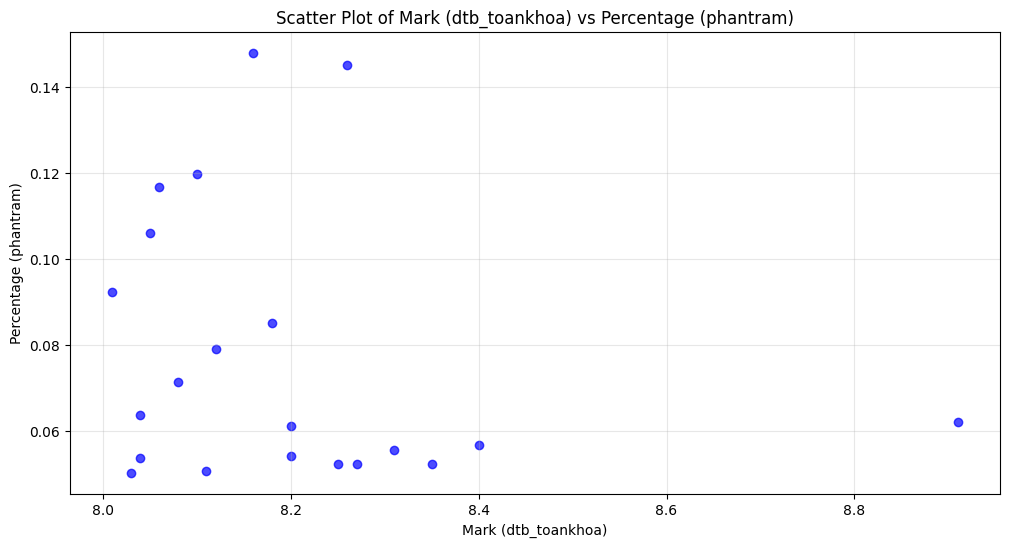

In [74]:
plt.figure(figsize=(12, 6))
plt.scatter(df_invalid['dtb_toankhoa'], df_invalid['phantram'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Mark (dtb_toankhoa) vs Percentage (phantram)')
plt.xlabel('Mark (dtb_toankhoa)')
plt.ylabel('Percentage (phantram)')
plt.grid(alpha=0.3)
plt.show()

In [69]:
value_counts = df_label['label'].value_counts()

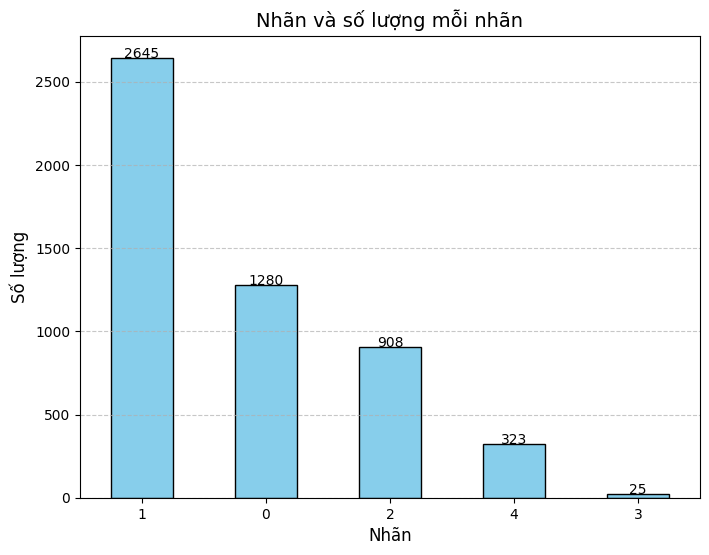

In [70]:
# Plotting the bar chart with numbers above the columns
value_counts = df_label['label'].value_counts()
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add numbers above each bar
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=10)

plt.title('Nhãn và số lượng mỗi nhãn', fontsize=14)
plt.xlabel('Nhãn', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [71]:
for index,row in df_label.iterrows():
  if row['mssv'] in df_invalid['mssv'].values:
    df_label.at[index,'label'] = 1

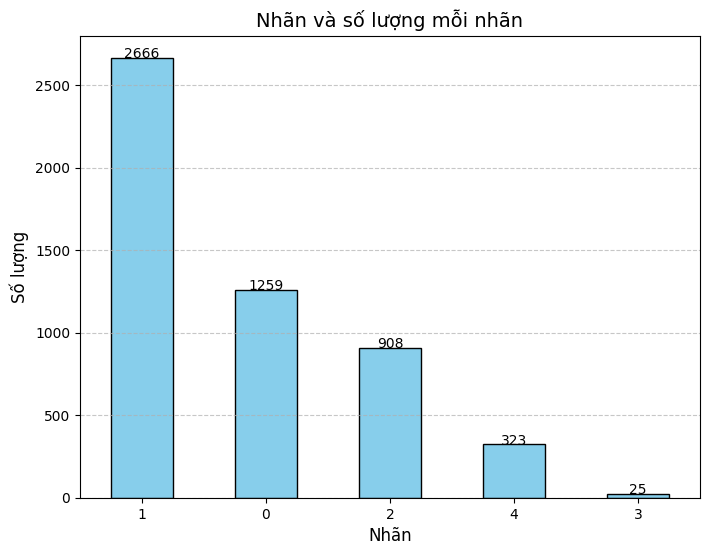

In [72]:
# Plotting the bar chart with numbers above the columns
value_counts = df_label['label'].value_counts()
plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add numbers above each bar
for index, value in enumerate(value_counts):
    plt.text(index, value + 0.1, str(value), ha='center', fontsize=10)

plt.title('Nhãn và số lượng mỗi nhãn', fontsize=14)
plt.xlabel('Nhãn', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [73]:
#df_label.to_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/label/label_clean_reverify.csv',index=False)

In [65]:
df_sinhvien_hoclai_notexist = df_sinhvien_hoclai[~df_sinhvien_hoclai['mssv'].isin(df_clean['mssv'])]

In [66]:
df_sinhvien_hoclai_notexist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5660 entries, 1 to 8866
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    5660 non-null   object 
 1   sotc    5660 non-null   float64
dtypes: float64(1), object(1)
memory usage: 132.7+ KB
